# Root-mean-square-differences Time Range

Root-mean-square differences for a range

In [75]:
%matplotlib inline
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_cmap.NWS_standard_cmap import cm_wind, cm_temp, cm_dpt
from BB_cmap.reflectivity_cmap import reflect_ncdc

mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

In [2]:
latlon = get_hrrr_latlon()
lat = latlon['lat']
lon = latlon['lon']

counties = True

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
m = draw_HRRR_map()
#m = draw_centermap(lat=39.5, lon=-111.6, size=(3, 4))

---

In [41]:
sDATE = datetime(2018, 8, 1)
eDATE = datetime(2018, 8, 3)
hours = range(5,6)
F = range(19)

variable = 'TMP:2 m'

if variable.split(':')[0] in ['UVGRD', 'GUST', 'WIND']:
    CMAP = cm_wind()
elif variable.split(':')[0] == 'TMP':
    CMAP = cm_temp()
elif variable == 'REFC:entire':
    CMAP = reflect_ncdc()

cmap = CMAP['cmap']
vmin = CMAP['vmin']
vmax = CMAP['vmax']

if variable == 'CAPE:surface':
    cmap = 'OrRd'
    vmin = 0
    vmax = 3500

In [42]:
# List of dates
VALID_DATES = [sDATE+timedelta(days=d)+timedelta(hours=h) for d in range((eDATE-sDATE).days) for h in hours]

In [66]:
for v in VALID_DATES:
    print(v)

2018-08-01 05:00:00
2018-08-02 05:00:00


In [104]:
for i, validDATE in enumerate(VALID_DATES):
    print(validDATE)
    timer = datetime.now()
    # Load all forecast grids for this time
    if variable.split(':')[0] == 'UVGRD':
        forecasts = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['SPEED'] for f in F])
    else:
        forecasts = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['value'] for f in F])


    if variable.split(':')[0] in ['TMP', 'DPT']:
        forecasts -= 273.15
        
    print('%s Timer:' % (i), datetime.now()-timer)
    
    differences = np.array([forecasts[i]-forecasts[j] for i in F for j in F if i-j > 0])
    
    # Differences between each forecasts (don't double count)
    if i == 0:
        differences_all = differences
    else:
        differences_all = np.vstack([differences_all, differences])

2018-08-01 05:00:00
0 Timer: 0:01:15.062671
2018-08-02 05:00:00
1 Timer: 0:00:36.431700


In [65]:
# Show that there is no dobule counting:
print(['F%02d-F%02d' % (i, j) for i in F for j in F if i-j > 0])

['F01-F00', 'F02-F00', 'F02-F01', 'F03-F00', 'F03-F01', 'F03-F02', 'F04-F00', 'F04-F01', 'F04-F02', 'F04-F03', 'F05-F00', 'F05-F01', 'F05-F02', 'F05-F03', 'F05-F04', 'F06-F00', 'F06-F01', 'F06-F02', 'F06-F03', 'F06-F04', 'F06-F05', 'F07-F00', 'F07-F01', 'F07-F02', 'F07-F03', 'F07-F04', 'F07-F05', 'F07-F06', 'F08-F00', 'F08-F01', 'F08-F02', 'F08-F03', 'F08-F04', 'F08-F05', 'F08-F06', 'F08-F07', 'F09-F00', 'F09-F01', 'F09-F02', 'F09-F03', 'F09-F04', 'F09-F05', 'F09-F06', 'F09-F07', 'F09-F08', 'F10-F00', 'F10-F01', 'F10-F02', 'F10-F03', 'F10-F04', 'F10-F05', 'F10-F06', 'F10-F07', 'F10-F08', 'F10-F09', 'F11-F00', 'F11-F01', 'F11-F02', 'F11-F03', 'F11-F04', 'F11-F05', 'F11-F06', 'F11-F07', 'F11-F08', 'F11-F09', 'F11-F10', 'F12-F00', 'F12-F01', 'F12-F02', 'F12-F03', 'F12-F04', 'F12-F05', 'F12-F06', 'F12-F07', 'F12-F08', 'F12-F09', 'F12-F10', 'F12-F11', 'F13-F00', 'F13-F01', 'F13-F02', 'F13-F03', 'F13-F04', 'F13-F05', 'F13-F06', 'F13-F07', 'F13-F08', 'F13-F09', 'F13-F10', 'F13-F11', 'F13-F12'

In [103]:
print('Number of NAN grids:', np.sum(np.isnan(differences_all))/1059/1799)

Number of NAN grids: 18.0


In [87]:
RMSD_all = np.sqrt(np.nanmean(differences_all**2, axis=0))

In [100]:
np.shape(RMSD_all)

(1059, 1799)

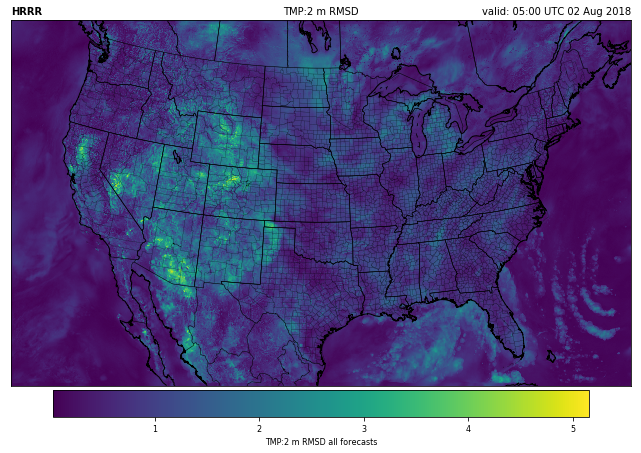

In [86]:
m.pcolormesh(lon, lat, RMSD_all, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
cb.set_label('%s RMSD all forecasts' % variable)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
if counties:
    m.drawcounties()

plt.title('HRRR', loc='left', fontweight='semibold')
plt.title('%s RMSD' % variable)
plt.title('valid: %s' % validDATE.strftime('%H:%M UTC %d %b %Y'), loc='right')
plt.savefig('RMSD_%s_all' % variable.replace(":", "-").replace(" ", "-"))

# RMSE variability plotted over the analysis

In [869]:
np.linspace(0, np.max(RMSE_all), 4)

array([  0.        , 297.01688639, 594.03377279, 891.05065918])

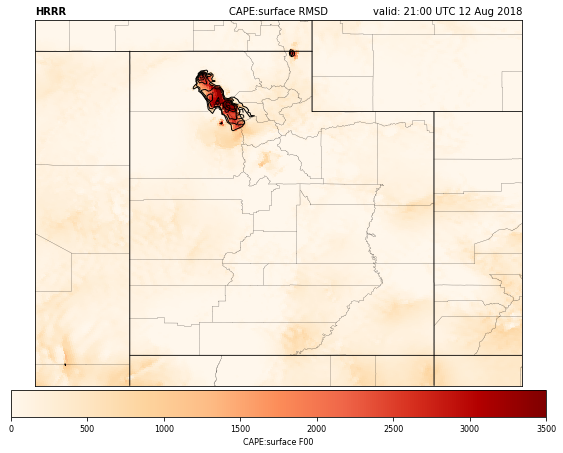

In [870]:
# Plot Model Analysis
GRID = forecasts[0]

if variable == 'REFC:entire':
    GRID = np.ma.masked_array(GRID)
    GRID[GRID<0] = np.ma.masked
    levels = range(3,300,10)
elif variable == 'CAPE:surface':
    levels = range(500,30000,300)
else:
    levels = range(3,300,3)
    
m.pcolormesh(lon, lat, GRID, cmap=cmap, vmin=vmin, vmax=vmax, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
cb.set_label('%s F00' % variable)

# Contour areas of RMSE
CS = m.contour(lon, lat, RMSD_all, latlon=True,
               levels=levels,
               linewidths=1,
               colors='k')
plt.clabel(CS, inline=1, fmt='%1.f', fontsize=10)


m.drawcoastlines()
m.drawstates()
m.drawcountries()
if counties:
    m.drawcounties()

plt.title('HRRR', loc='left', fontweight='semibold')
plt.title('%s RMSD' % variable)
plt.title('valid: %s' % validDATE.strftime('%H:%M UTC %d %b %Y'), loc='right')

plt.savefig('contour_RMSD_%s_all' % variable.replace(":", "-").replace(" ", "-"))

---

RMSD between consecutive forecasts and all reference hours

F18-F17, F17-F16, F16-F15, etc.
F18-F17, F18-F16, F18-F15, etc.

In [863]:
x, y = np.meshgrid(F, F)

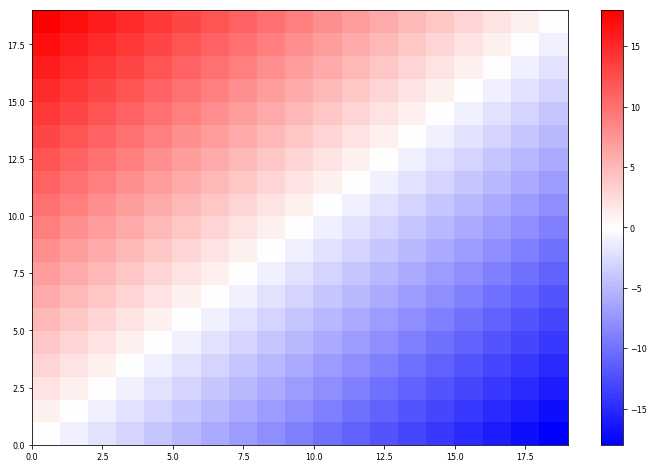

In [864]:
plt.pcolormesh(y-x, cmap='bwr')
plt.colorbar()